# Project: Breast Cancer Detection Using Machine Learning

### The Breast Cancer Wisconsin (Diagnostic) Data Set is obtained from UCI Machine Learning Repository. The goal of this analysis is to train machine learning algorithms to accurately distinguish between a benign and malignant tumor to aid in clinical diagnosis.

There are two types of tumors: benign, which are non-cancerous and malignant, which are cancerous. Benign tumors are not generally aggressive around the surrounding tissue and in some cases, may continue to grow. Malignant tumors are aggressive and cancerous because of damage around the surrounding tissue and may be removed depending on the severity or aggressiveness of the tumor.

In [1]:
# Import the essential libraries.
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     
from sklearn.linear_model import LogisticRegression    
from sklearn.tree import DecisionTreeClassifier        
from sklearn.ensemble import RandomForestClassifier    
from sklearn.neural_network import MLPClassifier       
from sklearn.svm import SVC                            
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load the breast cancer dataset from sklearn.
cancer = load_breast_cancer()

In [3]:
# Display the sklearn breast cancer dataset keys. 
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# Display each cells data in numeric format.
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
# Display the target column resulting in a Malignant or Benign Value
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

0 = Malignant Tumor

1 = Benign Tumor

In [6]:
# Display the 2 target names. 
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
# The cancer.DESCR stores the description of breast cancer dataset.
# Description of the data.
print(cancer.DESCR[27:3130])


Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Rad

In [8]:
#Column names which are also known as features.
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
cancer.filename

'C:\\Users\\Owner\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\breast_cancer.csv'

In [10]:
# Display the Data providing the number of Rows and Columns
type(cancer.data)
cancer.data.shape

(569, 30)

In [11]:
#Getting information of cancer DataFrame using the .info() method.
df_features = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Total of 569 non-null patients’ information with 30 features.  All feature data types in the float. The size of the DataFrame is 133.5 KB.

In [12]:
# Display the total count of 0=Malignenet & 1=Benign
df_target = pd.DataFrame(cancer.target, columns=['target'])
df_target['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [13]:
# Merge the features and the target variable.
df = pd.concat([df_features, df_target], axis=1)

In [14]:
# Transform into text.
df['target'] = df['target'].apply(lambda x: "Benign"
                                  if x == 1 else "Malignant")
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [15]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Feature Selection:

In [16]:
from sklearn.feature_selection import SelectKBest, chi2
feature_selection = SelectKBest(chi2, k=5)
feature_selection.fit(df_features, df_target)
selected_features = df_features.columns[feature_selection.get_support()]
print("The five selected features are: ", list(selected_features))

The five selected features are:  ['mean perimeter', 'mean area', 'area error', 'worst perimeter', 'worst area']


In [17]:
X = pd.DataFrame(feature_selection.transform(df_features),
                 columns=selected_features)
X.head()

,mean perimeter,mean area,area error,worst perimeter,worst area
0,122.80,1001.0,153.40,184.60,2019.0
1,132.90,1326.0,74.08,158.80,1956.0
2,130.00,1203.0,94.03,152.50,1709.0
3,77.58,386.1,27.23,98.87,567.7
4,135.10,1297.0,94.44,152.20,1575.0


In [18]:
from matplotlib.colors import ListedColormap
import seaborn as sns

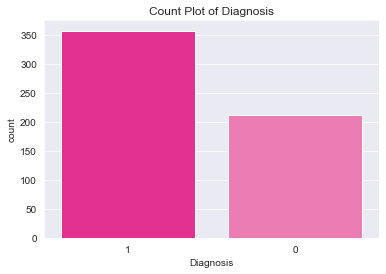

In [19]:
sns.set_style('darkgrid')
sns.countplot(cancer['target'], label="Count", palette=sns.color_palette(['#FF1493', '#FF69B4']),
              order=pd.value_counts(cancer['target']).iloc[:17].index)
df['target'].value_counts()
plt.xlabel("Diagnosis")
plt.title("Count Plot of Diagnosis")
plt.show()

# K-Nearest Neighbor (KNN) Classification

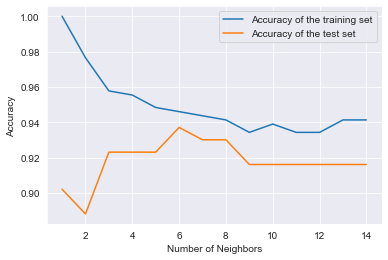

In [20]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# Try KNN for diffrent K nearest neighbor from 1 to 15
neighbors_setting = range(1,15)

for n_neighbors in neighbors_setting:
    # Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    # Train the model using the training set
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

Looking at the above plot, best result accurs when the Number of Neighbors is 6.

In [21]:
print("Accuracy of the Training Set for 6NN: {:3f}".format(training_accuracy[5]))
print("Accuracy of the Test Set for 6NN: {:3f}".format(test_accuracy[5]))

Accuracy of the Training Set for 6NN: 0.946009
Accuracy of the Test Set for 6NN: 0.937063


# Logistic Regression

In [22]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print('Accuracy of the Training Set for Logistic Regression: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy of the Test Set for Logistic Regression: {:.3f}'.format(log_reg.score(X_test,y_test)))

Accuracy of the Training Set for Logistic Regression: 0.941
Accuracy of the Test Set for Logistic Regression: 0.965


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression seems it does better than the K-Nearest Neighbor (KNN) Classification.

# Decision Tree

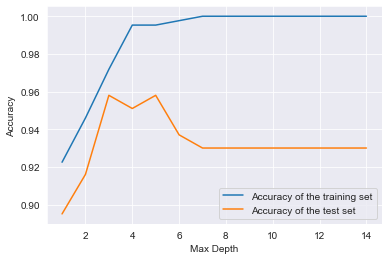

In [23]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

training_accuracy = []
test_accuracy = []

max_dep = range(1,15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))
 
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

# Random Forests

In [24]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

print('Accuracy of the Training Set for Random Forest: {:.3f}'.format(forest.score(X_train,y_train)))
print('Accuracy of the Test Set for Random Forest: {:.3f}'.format(forest.score(X_test,y_test)))

Accuracy of the Training Set for Random Forest: 1.000
Accuracy of the Test Set for Random Forest: 0.972
